In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler, StandardScaler

from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_absolute_error, max_error

In [2]:
df_option = pd.read_pickle("df_final_jointed_all_train_beta.pkl")

In [5]:
df_option['Class_target'] = df_option['Class_target'].apply(lambda x : True if x > 0 else False)

In [6]:
df_option['Class_target']

Date_Only
2024-01-05    False
2024-01-12    False
2024-01-19    False
2024-01-26    False
2024-02-02    False
              ...  
2025-02-28     True
2025-03-07    False
2025-03-14     True
2025-03-21    False
2025-03-28    False
Name: Class_target, Length: 63, dtype: bool

In [ ]:
def is_third_friday(date_ts):
    return date_ts.weekday() == 4 and 15 <= date_ts.day <= 21

In [ ]:
df_option['OP_EXP'] = [is_third_friday(df_option.index[i]) for i in range(len(df_option.index))]

In [ ]:
#sign = lambda x : True if x >0 else False

In [ ]:
#df_option["Up_down"] = [sign(df_option['diff_cut_close'].values[i]) for i in range(len(df_option))]

In [7]:
df_option.reset_index(inplace=True)

In [8]:
df_option.columns

Index(['Date_Only', 'Target_std', 'prior_std', 'prior_Vol', 'cut_open',
       'RSI_14', 'RSI_30', 'RSI_60', 'cut_1hr', 'cut_2hr', 'cut_3hr',
       'Class_target', 'vix_prior_std', 'vix_cut_open', 'vix_cut_1hr',
       'vix_cut_2hr', 'vix_cut_3hr', 'tqqq_prior_std', 'tqqq_Vol',
       'tqqq_cut_open', 'tqqq_cut_1hr', 'tqqq_cut_2hr', 'tqqq_cut_3hr'],
      dtype='object')

In [9]:
X = df_option.drop(['Date_Only','Target_std', 'Class_target'], axis=1)  
y = df_option['Class_target']

In [10]:
y.value_counts()

Class_target
False    35
True     28
Name: count, dtype: int64

In [11]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=10)

In [12]:
scaler = StandardScaler()
scaled_X_train = scaler.fit_transform(X_train)
scaled_X_test = scaler.transform(X_test)

In [13]:
from sklearn.linear_model import LogisticRegressionCV 

In [14]:
log_model = LogisticRegressionCV(max_iter=1000)

In [15]:
log_model.fit(scaled_X_train,y_train)

LogisticRegressionCV(max_iter=1000)

In [16]:
from sklearn.metrics import confusion_matrix, classification_report, ConfusionMatrixDisplay

In [17]:
y_pred = log_model.predict(scaled_X_test)

In [18]:
confusion_matrix(y_test,y_pred)

array([[5, 3],
       [4, 1]], dtype=int64)

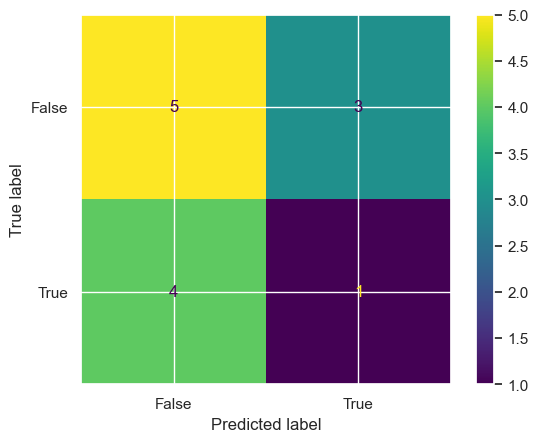

In [19]:
import matplotlib.pyplot as plt

ConfusionMatrixDisplay.from_predictions(y_test, y_pred)
plt.show()

In [20]:
coefs = pd.Series(index=X.columns,data=log_model.coef_[0])

In [21]:
coefs = coefs.sort_values()

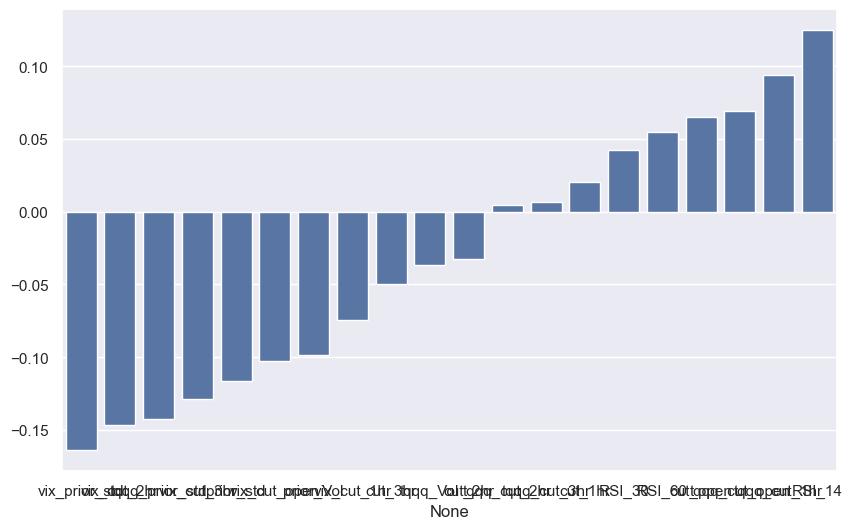

In [22]:
plt.figure(figsize=(10,6))
sns.barplot(x=coefs.index,y=coefs.values);

In [23]:
model = DecisionTreeClassifier()

In [24]:
model.fit(X_train,y_train)

DecisionTreeClassifier()

In [25]:
base_pred = model.predict(X_test)

In [26]:
confusion_matrix(y_test,base_pred)

array([[4, 4],
       [3, 2]], dtype=int64)

In [27]:
param_grid = {
    'criterion': ['gini', 'entropy'],
    'max_depth': [None, 5, 10, 15],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 5]
}

In [34]:
grid_search = GridSearchCV(DecisionTreeClassifier(), param_grid, cv=10, scoring='accuracy')

In [35]:
grid_search.fit(X_train, y_train)

GridSearchCV(cv=10, estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [None, 5, 10, 15],
                         'min_samples_leaf': [1, 2, 5],
                         'min_samples_split': [2, 5, 10]},
             scoring='accuracy')

In [36]:
best_params = grid_search.best_params_
best_model = grid_search.best_estimator_

In [37]:
from sklearn.metrics import accuracy_score
y_pred = best_model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print("Best parameters:", best_params)
print("Accuracy:", accuracy)

Best parameters: {'criterion': 'gini', 'max_depth': None, 'min_samples_leaf': 5, 'min_samples_split': 5}
Accuracy: 0.6153846153846154


In [38]:
base_pred = best_model.predict(X_test)

In [39]:
confusion_matrix(y_test,base_pred)

array([[5, 3],
       [2, 3]], dtype=int64)

In [41]:
pd.DataFrame(index=X.columns,data=best_model.feature_importances_,columns=['Feature Importance'])

,Feature Importance
prior_std,0.000000
prior_Vol,0.000000
cut_open,0.000000
RSI_14,0.000000
RSI_30,0.000000
RSI_60,0.000000
cut_1hr,0.000000
cut_2hr,0.000000
cut_3hr,0.000000
vix_prior_std,0.104099
